In [ ]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

url = 'https://raw.githubusercontent.com/Alcalyxz/datasetProjectIA/main/Training-Dataset.csv'

df = pd.read_csv(url)
print(df.head(5))


   having_IP_Address  URL_Length  ...  Statistical_report  Result
0                 -1           1  ...                  -1      -1
1                  1           1  ...                   1      -1
2                  1           0  ...                  -1      -1
3                  1           0  ...                   1      -1
4                  1           0  ...                   1       1

[5 rows x 31 columns]


In [ ]:
df = df.drop(['having_Sub_Domain'], axis=1)
df = df.drop(['URL_of_Anchor'], axis=1)
df = df.drop(['Links_in_tags'], axis=1)
df = df.drop(['Redirect'], axis=1)
df = df.drop(['web_traffic'], axis=1)
df = df.drop(['Links_pointing_to_page'], axis=1)

##Debido a la alta correlaciòn (0.95) con PopUpWindow se elimina una de las dos ya que le aportan
##La misma informaciòn al sistema 
df = df.drop(['Favicon'], axis=1)

In [ ]:
df = df.drop(df[df['URL_Length']==0].index)
df = df.drop(df[df['SSLfinal_State']==0].index)
df = df.drop(df[df['SFH']==0].index)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df = df.replace({-1: 0})

In [ ]:
YEntrenamiento = df['Result']
XEntrenamiento = scaler.fit_transform(df.drop(['Result'],axis=1))

In [ ]:
!pip install scikit-plot

In [ ]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
import scikitplot as skplt 
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import StratifiedKFold
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [ ]:
def experimentar(X,Y,oversampling=False):
    Folds = 10
    skf = StratifiedKFold(n_splits=Folds)
    resultados = pd.DataFrame()
    idx = 0
    Acc = []
    Auc= []

    for j, (train, test) in enumerate(skf.split(X, Y)):
        Xtrain= X[train,:]
        Ytrain = Y[train]
        Xtest = X[test, :]
        Ytest = Y[test]
        scaler = StandardScaler().fit(X= Xtrain)       
        Xtrain = scaler.transform(Xtrain)
        Xtest = scaler.transform(Xtest)
        model = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.3, store_covariance=True,
                              tol=0.01)
        if oversampling:
            sm = SMOTE(random_state=42)
            Xtrain, Ytrain = sm.fit_resample(Xtrain, Ytrain)
            
        model.fit(X=Xtrain, y=Ytrain)
        Yest = model.predict_proba(Xtest)
        
        Acc.append(balanced_accuracy_score(Ytest,np.argmax(Yest, 1)))
        aux=roc_auc_score(Ytest,Yest[:,1])
        Auc.append(aux)
    skplt.metrics.plot_confusion_matrix(Ytest,np.argmax(Yest, 1),normalize=True) #matriz de confusión
    skplt.metrics.plot_roc(Ytest,Yest)
    print(classification_report(Ytest,np.argmax(Yest, 1)))
    
    resultados.loc[idx,'AUC medio'] = np.mean(Auc)
    resultados.loc[idx,'AUC intervalo de confianza'] = np.std(Auc)
    resultados.loc[idx,'Accuracy medio'] = np.mean(Acc)
    resultados.loc[idx,'Accuracy intervalo de confianza'] = np.std(Acc)
    return (resultados)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminan

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       349
           1       0.92      0.90      0.91       560

    accuracy                           0.89       909
   macro avg       0.88      0.89      0.88       909
weighted avg       0.89      0.89      0.89       909



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,AUC medio,AUC intervalo de confianza,Accuracy medio,Accuracy intervalo de confianza
0,0.948217,0.007844,0.882741,0.01093


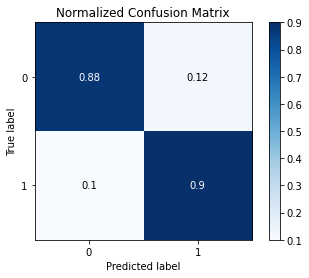

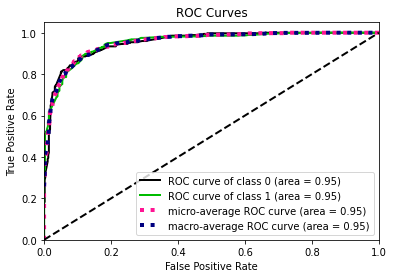

In [ ]:
experimentar(XEntrenamiento,YEntrenamiento,False)